### Comparison with vectorized and original functions
#### Written by Erich Zimmer
#### Created at 20210817, 2109 CTZ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openpiv.pyprocess import find_first_peak,\
    vectorized_correlation_to_displacements
from openpiv.tools import imread
from numpy import log

### Vectorized solution for subpixel estimation

In [2]:
N = 64

corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
pos,height = find_first_peak(corr)

In [4]:
pos,height

((3, 4), 3.0)

In [5]:
from openpiv.pyprocess import find_subpixel_peak_position

In [6]:
find_subpixel_peak_position(corr) 

(3.0, 3.769577293545741)

In [7]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 0 bad peak(s)


array([[3.       ],
       [3.7695773]])

## let's find some corner cases

In [8]:
# peak on the border 
corr = np.zeros((N,N))

corr[:3,:3] = 1
corr[0,0] = 2
corr[0,2] = 3
corr[0,3] = 1
corr

array([[2., 1., 3., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Corner case 1: peak on the border

it is disregarded in our function because we cannot define well the subpixel
position. Or do we? 

In [9]:
find_subpixel_peak_position(corr)

(nan, nan)

In [10]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [11]:
# peak on the border 
corr = np.flipud(corr)
corr

array([[1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07],
       [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07],
       [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07],
       ...,
       [1.0000001e+00, 1.0000001e+00, 1.0000001e+00, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07],
       [1.0000001e+00, 1.0000001e+00, 1.0000001e+00, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07],
       [2.0000001e+00, 1.0000001e+00, 3.0000001e+00, ..., 1.0000000e-07,
        1.0000000e-07, 1.0000000e-07]])

In [12]:
find_subpixel_peak_position(corr)

(nan, nan)

In [13]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [14]:
corr = np.fliplr(corr)
corr[-2,-1]=5
corr

array([[2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 2.0000000e-07,
        2.0000000e-07, 2.0000000e-07],
       [2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 2.0000000e-07,
        2.0000000e-07, 2.0000000e-07],
       [2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 2.0000000e-07,
        2.0000000e-07, 2.0000000e-07],
       ...,
       [2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 1.0000002e+00,
        1.0000002e+00, 1.0000002e+00],
       [2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 1.0000002e+00,
        1.0000002e+00, 5.0000000e+00],
       [2.0000000e-07, 2.0000000e-07, 2.0000000e-07, ..., 3.0000002e+00,
        1.0000002e+00, 2.0000002e+00]])

In [15]:
find_subpixel_peak_position(corr)

(nan, nan)

In [16]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [17]:
## Corner case 2: zero next to the peak - the log(0) fails

In [18]:
corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
# corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
find_subpixel_peak_position(corr)

(3.0, 3.5230088020336483)

In [20]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 0 bad peak(s)


array([[3.        ],
       [3.52395088]])

In [21]:
eps = 1e-7
for method in ['gaussian','parabolic','centroid']:
    i,j = find_subpixel_peak_position(corr,method)
    print(i,j)
    i,j = find_subpixel_peak_position(corr+eps,method)
    print(i,j)


3.0 3.5245386005349215
3.0 3.5253214094430922
3.0 3.75
3.0 3.75
3.0 3.6000001199999647
3.0 3.600000167999929


In [22]:
for method in ['gaussian','parabolic','centroid']:
    j, i = vectorized_correlation_to_displacements(corr[np.newaxis, :, :], subpixel_method = method) + np.floor(corr.shape[0] / 2)
    print(i, j)

Found 0 bad peak(s)
[3.] [3.52561304]
Found 0 bad peak(s)
[3.] [3.75]
Found 0 bad peak(s)
[3.] [3.60000019]


### Speed increase demonstration

In [23]:
import pylab

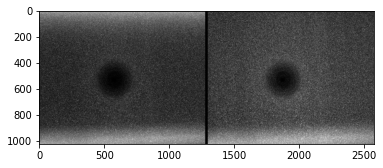

In [24]:
frame_a = imread('../test11/A001_1.tif')
frame_b = imread('../test11/A001_2.tif')
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],
             cmap=pylab.cm.gray)

In [25]:
window_size = 32
overlap = 16
from openpiv.pyprocess import moving_window_array, get_field_shape,\
    get_coordinates, fft_correlate_images, correlation_to_displacement
n_rows, n_cols = get_field_shape(
            frame_a.shape, 
            window_size, 
            overlap
        )
x, y = get_coordinates(frame_a.shape, window_size, overlap)

aa = moving_window_array(
            frame_a, 
            window_size, 
            overlap
)

bb = moving_window_array(
            frame_b, 
            window_size,
            overlap
)
corr = fft_correlate_images(
            aa, bb,
            correlation_method='circular',
            normalized_correlation = True
)

In [26]:
%%time
u_o, v_o = correlation_to_displacement(
            corr, 
            n_rows,
            n_cols,
            subpixel_method='gaussian'
        )

Wall time: 2.31 s


In [27]:
%%time
u_v, v_v = vectorized_correlation_to_displacements(
    corr,
    n_rows,
    n_cols,
    subpixel_method='gaussian',
    #eps = 1e-7
)

Found 12 bad peak(s)
Wall time: 94.9 ms


In [28]:
# slight descrepancies possibly caused by setting eps to 1e-10
print('[u original, u vectorized]')
print(np.stack((u_o[0], u_v[0])).T)

[u original, u vectorized]
[[-2.36462159 -2.36462164]
 [-2.42157285 -2.42157292]
 [-2.77813517 -2.77813518]
 [-2.96134029 -2.96134032]
 [-2.84248631 -2.84248631]
 [-2.90768447 -2.90768447]
 [-2.90936752 -2.90936757]
 [-2.97392531 -2.97392533]
 [-2.99476203 -2.99476203]
 [-3.01880578 -3.01880582]
 [-3.02868449 -3.0286845 ]
 [-2.98723134 -2.98723136]
 [-2.98152419 -2.98152421]
 [-2.97271487 -2.97271486]
 [-2.94818314 -2.94818311]
 [-2.96047559 -2.96047557]
 [-2.97860025 -2.97860024]
 [-3.0605641  -3.06056407]
 [-3.10927108 -3.10927109]
 [-3.0611965  -3.06119654]
 [-3.09748139 -3.09748138]
 [-3.06309985 -3.06309982]
 [-3.1254754  -3.12547541]
 [-3.06026851 -3.06026854]
 [-3.0850795  -3.08507954]
 [-3.26921477 -3.26921472]
 [-3.13382262 -3.13382259]
 [-3.20236138 -3.20236136]
 [-3.53755296 -3.53755298]
 [-3.95482004 -3.95482007]
 [-3.88840051 -3.88840058]
 [-3.88294493 -3.88294496]
 [-3.83515182 -3.83515182]
 [-3.84393737 -3.84393741]
 [-3.96185406 -3.961854  ]
 [-3.87547955 -3.87547959]
 

### Vectorized solution for signal-to-noise calculation

In [29]:
from openpiv.pyprocess import vectorized_sig2noise_ratio,\
    sig2noise_ratio

In [30]:
%%time
peak2peak_o = sig2noise_ratio(corr, 'peak2peak')

Wall time: 2.16 s


In [31]:
%%time
peak2peak_v = vectorized_sig2noise_ratio(corr, 'peak2peak')

Wall time: 489 ms


In [32]:
%%time
peak2mean_o = sig2noise_ratio(corr, 'peak2mean')

Wall time: 390 ms


In [33]:
%%time
peak2mean_v = vectorized_sig2noise_ratio(corr, 'peak2mean')

Wall time: 134 ms


In [34]:
print('[original, vectorized]')
print(np.stack((peak2peak_o[0:10], peak2peak_v[0:10])).T)

[original, vectorized]
[[1.61201177 1.61201179]
 [1.50204599 1.50204599]
 [1.73240205 1.73240209]
 [1.77473047 1.77473044]
 [1.76908798 1.76908803]
 [1.75000654 1.75000656]
 [1.81941134 1.8194114 ]
 [2.08015    2.08014989]
 [2.25951785 2.25951791]
 [2.30283286 2.30283284]]


In [35]:
print('[original, vectorized]')
print(np.stack((peak2mean_o[0:10], peak2mean_v[0:10])).T)

[original, vectorized]
[[2.55781099 2.55781102]
 [2.50379178 2.50379181]
 [2.71928184 2.71928191]
 [2.86304339 2.86304331]
 [2.81330867 2.81330872]
 [2.58982243 2.58982253]
 [2.6741547  2.67415476]
 [2.98704881 2.98704886]
 [3.23796001 3.2379601 ]
 [3.39735055 3.39735055]]
